## Modelo ML - TFM

### RANDOM FOREST

In [1]:
import sys

# Redirigir las advertencias a la salida estándar de errores (stderr)
if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")

In [2]:
# IMPORTO LIBRERIAS PRINCIPALES
import pandas as pd
import numpy as np
!pip install sklearn
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report

In [3]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [4]:
# Visualizo los datos iniciales
data = pd.read_csv('ETL_chutes_ML.csv')
data = data.drop('Unnamed: 0', axis=1)
data.head(3)

,duration,id,index,location,match_id,minute,period,play_pattern,player,player_id,position,possession,possession_team,possession_team_id,related_events,second,shot_body_part,shot_end_location,shot_outcome,shot_statsbomb_xg,shot_technique,shot_type,team,timestamp,type,location_x,location_y,shot_end_location_x,shot_end_location_y,shot_end_location_z,related_events1,related_events2,related_events3
0,0.409912,d2718eb2-e1f7-4fd3-8ff2-d219c6f4a5b1,178,"[115.0, 27.4]",3775624,3,1,From Throw In,Georgia Stanway,4643,Left Wing,11,Manchester City WFC,746,['d7f771f5-83af-45d0-ad46-77a9297c4fe7'],20,Right Foot,"[120.0, 35.6, 0.0]",Off T,0.090585,Normal,Open Play,Manchester City WFC,-2208988599043,Shot,115.0,27.4,120.0,35.6,0.0,d7f771f5-83af-45d0-ad46-77a9297c4fe7,NaN,NaN
1,0.838473,37db8546-a582-43dd-8c3a-c14a3ed27098,352,"[112.6, 37.7]",3775624,7,1,From Corner,Chloe Kelly,15570,Right Wing,22,Manchester City WFC,746,"['0efc252d-d808-4f3c-a881-f74012e4eb6b', '9694...",58,Right Foot,"[120.0, 36.8, 2.2]",Goal,0.187237,Half Volley,Open Play,Manchester City WFC,-2208988321293,Shot,112.6,37.7,120.0,36.8,2.2,0efc252d-d808-4f3c-a881-f74012e4eb6b,9694ce24-056f-4f35-81f5-cd688420aa69,NaN
2,0.236658,7bee50ac-8f4f-4bf5-87a4-cf7a27007a6f,674,"[113.3, 38.5]",3775624,18,1,Regular Play,Samantha June Mewis,5087,Right Center Midfield,42,Manchester City WFC,746,"['9c111819-3d0c-44f0-869f-bc3055319caa', 'eff3...",12,Right Foot,"[117.1, 39.1]",Blocked,0.209922,Half Volley,Open Play,Manchester City WFC,-2208987707557,Shot,113.3,38.5,117.1,39.1,NaN,9c111819-3d0c-44f0-869f-bc3055319caa,eff31a93-588b-417a-820a-6c6ea6ad83af,NaN


In [5]:
# Elimino columnas irrelevantes para el modelo
columnas_a_eliminar = ['duration', 'id', 'index', 'location', 'match_id', 
                       'possession_team_id', 'related_events', 
                       'shot_end_location', 'team', 'timestamp', 
                       'type', 'shot_end_location_z', 'related_events1', 
                       'related_events2','related_events3', 
                       'possession_team']
data=data.drop(columnas_a_eliminar, axis=1)

In [6]:
# One hot encoding
encoded_data = pd.get_dummies(data, columns=['play_pattern', 'player', 
                                             'position', 
                                             'shot_body_part',
                                             'shot_technique', 
                                             'shot_type'])

In [7]:
#Label encoder de la variable objetivo "shot_outcome"
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
encoded_data['shot_outcome'] = label_encoder.fit_transform(encoded_data['shot_outcome'])

In [8]:
encoded_data.head(3)

,minute,period,player_id,possession,second,shot_outcome,shot_statsbomb_xg,location_x,location_y,shot_end_location_x,shot_end_location_y,play_pattern_From Corner,play_pattern_From Counter,play_pattern_From Free Kick,play_pattern_From Goal Kick,play_pattern_From Keeper,play_pattern_From Kick Off,play_pattern_From Throw In,play_pattern_Other,play_pattern_Regular Play,player_Abby Dahlkemper,player_Alex Greenwood,player_Caroline Weir,player_Chloe Kelly,player_Demi Stokes,player_Ellen White,player_Esme Beth Morgan,player_Gemma Bonner,player_Georgia Stanway,player_Janine Elizabeth Beckie,player_Jessica Park,player_Jill Scott,player_Keira Walsh,player_Laura Coombs,player_Lauren Hemp,player_Lucy Bronze,player_Rosemary Kathleen Lavelle,player_Samantha June Mewis,player_Stephanie Houghton,position_Center Attacking Midfield,position_Center Defensive Midfield,position_Center Forward,position_Left Back,position_Left Center Back,position_Left Center Midfield,position_Left Wing,position_Right Back,position_Right Center Back,position_Right Center Midfield,position_Right Midfield,position_Right Wing,shot_body_part_Head,shot_body_part_Left Foot,shot_body_part_Other,shot_body_part_Right Foot,shot_technique_Backheel,shot_technique_Half Volley,shot_technique_Lob,shot_technique_Normal,shot_technique_Overhead Kick,shot_technique_Volley,shot_type_Free Kick,shot_type_Open Play,shot_type_Penalty
0,3,1,4643,11,20,2,0.090585,115.0,27.4,120.0,35.6,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0
1,7,1,15570,22,58,1,0.187237,112.6,37.7,120.0,36.8,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0
2,18,1,5087,42,12,0,0.209922,113.3,38.5,117.1,39.1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0


In [9]:
# Guardamos los datos codificados en un csv
encoded_data.to_csv('encoded_data.csv', index=False)

In [10]:
# Creo 2 conjuntos, uno sin la variable objetivo y otro con la 
# variable objetivo
X = encoded_data.drop('shot_outcome', axis=1)  
y = encoded_data['shot_outcome'] 

In [11]:
# Divido los datos en TRAIN y TEST
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=42)

In [12]:
# Creo el modelo y lo entreno
random_forest = RandomForestClassifier(n_estimators=50, 
                                       max_depth=None, 
                                       min_samples_split=2, 
                                       random_state=42)
random_forest.fit(X_train, y_train)

RandomForestClassifier(n_estimators=50, random_state=42)

In [13]:
# Hago las predicciones con el conjunto de test
y_pred_forest = random_forest.predict(X_test)
y_pred_forest

array([2, 2, 0, 2, 0, 0, 2, 1, 2, 4, 2, 4, 0, 0, 2, 2, 0, 0, 2, 0, 0, 1,
       2, 2, 0, 2, 4, 0, 2, 2, 4, 0, 0, 0, 4, 2, 0, 2, 4, 0, 7, 4, 2, 0,
       2, 0, 2, 4, 2, 0, 2, 1, 2, 2, 2, 0, 1, 2, 4, 2, 0, 0, 0, 2, 0, 1,
       0, 4, 1, 2, 4, 2, 4, 0, 0, 2, 0, 0, 4, 2, 1, 4, 0, 0, 2])

In [14]:
# EXACTITUD del modelo RANDOM FOREST
accuracy_forest = accuracy_score(y_test, y_pred_forest)
print(f'Accuracy: {accuracy_forest:.3f}')

Accuracy: 0.824


In [15]:
from sklearn.metrics import confusion_matrix

#### OPTIMIZACIÓN DEL MODELO RANDOM FOREST

In [16]:
# MATRIZ DE CONFUSIÓN
confusion = confusion_matrix(y_test, y_pred_forest)
confusion

array([[24,  0,  0,  0,  1,  0,  0],
       [ 0,  5,  0,  0,  0,  0,  0],
       [ 0,  2, 30,  0,  0,  0,  0],
       [ 0,  0,  2,  0,  0,  0,  0],
       [ 6,  0,  0,  0, 11,  0,  1],
       [ 0,  0,  0,  0,  1,  0,  0],
       [ 1,  0,  0,  0,  1,  0,  0]])

In [17]:
from sklearn.model_selection import train_test_split, GridSearchCV

# Definir los hiperparámetros a explorar
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

In [18]:
# Crear el modelo de Random Forest
random_forest_opt = RandomForestClassifier(random_state=42)

In [19]:
# Realizar la búsqueda de hiperparámetros con validación cruzada
grid_search = GridSearchCV(estimator=random_forest_opt, 
                           param_grid=param_grid, 
                           scoring='accuracy', 
                           cv=3)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 150]},
             scoring='accuracy')

In [20]:
# Obtener el mejor modelo con los mejores hiperparámetros
best_random_forest = grid_search.best_estimator_

# Predicciones en el conjunto de prueba utilizando el mejor modelo
y_pred_best_forest = best_random_forest.predict(X_test)

# Calcular la exactitud del modelo
accuracy_forest = accuracy_score(y_test, y_pred_best_forest)
print(f'Accuracy: {accuracy_forest:.3f}')

# Obtener los mejores hiperparámetros
best_params = grid_search.best_params_
print('Mejores hiperparámetros:', best_params)

Accuracy: 0.824
Mejores hiperparámetros: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 50}


In [21]:
# Importancia de las variables en el modelo RANDOM FOREST
feature_importance1 = random_forest.feature_importances_
feature_importance1

array([4.58883641e-02, 1.04340884e-02, 2.63106586e-02, 4.34512090e-02,
       5.43694902e-02, 7.90741344e-02, 6.18692051e-02, 6.28323568e-02,
       2.92988874e-01, 9.18223637e-02, 9.96634086e-03, 1.38964275e-03,
       8.55188041e-03, 2.39614654e-03, 3.95809624e-04, 2.38676747e-03,
       1.08647414e-02, 2.54068338e-03, 1.10630647e-02, 5.09165512e-04,
       2.09595926e-03, 3.96520929e-03, 5.17284350e-03, 5.33979572e-04,
       5.90153952e-03, 2.55563804e-03, 1.12004721e-03, 3.79873768e-03,
       4.82166056e-03, 3.43354239e-04, 1.44985714e-03, 3.13694445e-03,
       1.63666810e-03, 4.92516965e-03, 4.61743176e-03, 5.41697444e-03,
       7.17944841e-03, 3.19964525e-03, 8.28102243e-04, 2.54993758e-03,
       5.90417252e-03, 4.56001185e-03, 1.73804030e-03, 5.20149248e-03,
       5.12130256e-03, 4.85502723e-03, 3.63920944e-03, 6.53311710e-03,
       9.57302588e-04, 6.93834403e-03, 1.24075714e-02, 1.26794232e-02,
       1.77593032e-04, 1.05243284e-02, 1.07169023e-03, 7.42637176e-03,
      

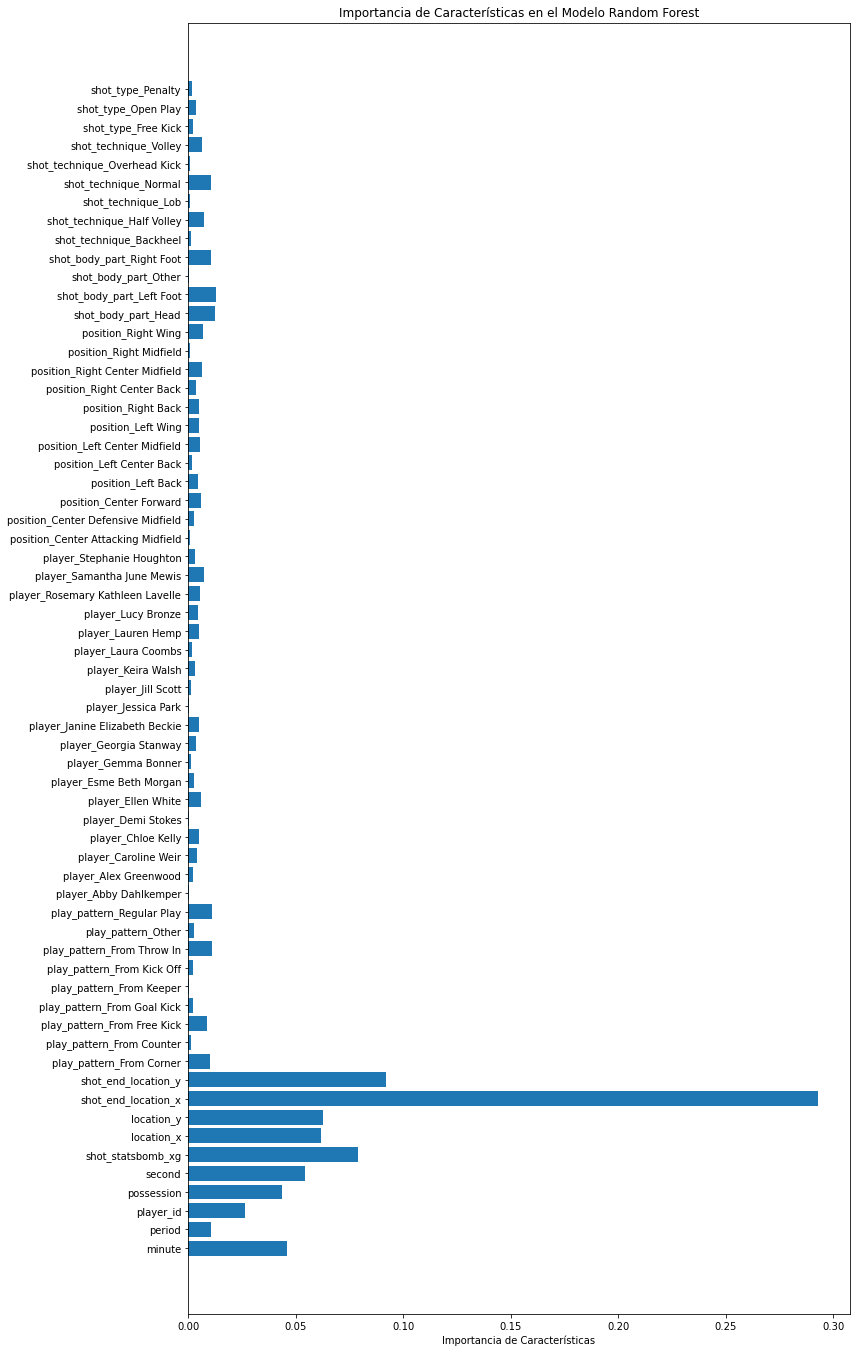

In [22]:
import matplotlib.pyplot as plt

# Obtener la importancia de las características desde el modelo
importances = random_forest.feature_importances_
feature_names = X_train.columns

# Gráfico de barras para mostrar la importancia de las características
plt.figure(figsize=(12, len(feature_names) * 0.3))  
plt.barh(range(len(feature_names)), importances, align='center')
plt.yticks(range(len(feature_names)), feature_names)

# Ajustar los márgenes para dar más espacio a las etiquetas del eje Y
plt.subplots_adjust(left=0.2)  # Ajusta este valor según sea necesario

plt.xlabel('Importancia de Características')
plt.title('Importancia de Características en el Modelo Random Forest')

plt.tight_layout()
plt.show()

## Prueba variables

In [23]:
# Matriz de correlación entre las variables
correlation_matrix = encoded_data.corr()
correlation_matrix

,minute,period,player_id,possession,second,shot_outcome,shot_statsbomb_xg,location_x,location_y,shot_end_location_x,shot_end_location_y,play_pattern_From Corner,play_pattern_From Counter,play_pattern_From Free Kick,play_pattern_From Goal Kick,play_pattern_From Keeper,play_pattern_From Kick Off,play_pattern_From Throw In,play_pattern_Other,play_pattern_Regular Play,player_Abby Dahlkemper,player_Alex Greenwood,player_Caroline Weir,player_Chloe Kelly,player_Demi Stokes,player_Ellen White,player_Esme Beth Morgan,player_Gemma Bonner,player_Georgia Stanway,player_Janine Elizabeth Beckie,player_Jessica Park,player_Jill Scott,player_Keira Walsh,player_Laura Coombs,player_Lauren Hemp,player_Lucy Bronze,player_Rosemary Kathleen Lavelle,player_Samantha June Mewis,player_Stephanie Houghton,position_Center Attacking Midfield,position_Center Defensive Midfield,position_Center Forward,position_Left Back,position_Left Center Back,position_Left Center Midfield,position_Left Wing,position_Right Back,position_Right Center Back,position_Right Center Midfield,position_Right Midfield,position_Right Wing,shot_body_part_Head,shot_body_part_Left Foot,shot_body_part_Other,shot_body_part_Right Foot,shot_technique_Backheel,shot_technique_Half Volley,shot_technique_Lob,shot_technique_Normal,shot_technique_Overhead Kick,shot_technique_Volley,shot_type_Free Kick,shot_type_Open Play,shot_type_Penalty
minute,1.000000,0.852603,0.009515,0.959713,0.018890,0.084425,-0.003443,-0.018783,-0.001214,-0.037020,0.045532,0.080278,-0.035211,-0.007786,0.039889,0.000233,-0.127239,-0.005004,0.058114,-0.047416,0.001626,0.052739,0.034618,-0.101599,-0.018827,-0.039089,0.025205,-0.078545,-0.028533,0.071719,0.095770,0.020124,-0.003906,0.094008,0.011068,0.069550,0.047564,-0.083636,-0.000314,0.066437,-0.068496,-0.033012,0.037510,-0.036544,0.081108,-0.001297,0.072594,0.032610,-0.068449,0.048290,-0.039311,0.002873,0.035189,-0.016246,-0.034078,-0.063186,-0.009735,0.062486,-0.014178,-0.022502,0.058807,-0.036127,-0.004282,0.058114
period,0.852603,1.000000,-0.021777,0.840990,0.039313,0.043690,0.008112,-0.002893,-0.057495,-0.044185,0.017761,0.108832,-0.023311,0.001740,0.006006,0.046004,-0.054091,-0.012629,0.059648,-0.084545,-0.003727,0.065367,0.054123,-0.071212,-0.005283,-0.020236,0.059648,-0.054091,-0.013325,0.061596,0.079869,-0.006486,-0.007507,0.027171,-0.023777,0.021863,0.054721,-0.076847,-0.011398,0.065136,-0.109758,-0.004691,0.010211,-0.007507,0.080436,0.002057,0.058489,0.020262,-0.062169,0.065136,-0.035047,-0.024477,0.064623,-0.051268,-0.038170,-0.072589,-0.029241,0.046004,-0.011921,-0.005283,0.085498,-0.008413,-0.027944,0.059648
player_id,0.009515,-0.021777,1.000000,0.033717,0.020723,0.026317,0.019145,0.035463,-0.106322,0.079969,0.005066,0.015512,0.040126,-0.000488,0.047365,-0.052002,-0.008424,-0.069760,0.026213,0.019064,-0.066615,0.038372,0.072051,0.532048,-0.104192,0.081635,-0.116679,0.143297,-0.404173,-0.262786,0.201391,0.025941,-0.147829,0.328191,0.382963,0.060126,-0.222116,-0.376860,0.046225,-0.066519,-0.100179,-0.041721,-0.106523,0.097265,0.107151,0.203338,-0.017987,0.009217,-0.398876,-0.068729,0.288921,-0.003032,0.036127,0.010675,-0.033148,0.015074,0.078893,0.010709,-0.101302,0.082401,0.018526,0.016107,-0.028549,0.026213
possession,0.959713,0.840990,0.033717,1.000000,0.026938,0.074940,0.008461,-0.005870,-0.002788,-0.036160,0.038999,0.037009,-0.042068,-0.014960,0.063299,-0.002876,-0.117836,-0.003214,0.057247,-0.013568,-0.001448,0.023430,0.018364,-0.082531,-0.016467,-0.034580,0.014358,-0.068082,-0.041379,0.066440,0.098511,0.056849,0.000717,0.065801,0.044768,0.077635,0.036876,-0.089574,0.000699,0.104175,-0.049926,-0.018523,-0.008920,-0.030338,0.062288,0.042982,0.081885,0.026688,-0.094679,0.022826,-0.045769,0.018498,0.023389,-0.013996,-0.034793,-0.072301,-0.039362,0.087940,0.011867,-0.009027,0.049269,-0.026669,-0.011545,0.057247
second,0.018890,0.039313,0.020723,0.026938,1.000000,-0.039692,0.140070,0.002705,-0.054355,0.003701,-0.069409,-0.064475,0.047532,0.003843,-0.011998,0.07

No vemos riesgo de multicolinealidad, aunque se va a tratar de eliminar algunas etiquetas con correlación próximas a 1 para evaluar como se modifica el modelo.

In [24]:
encoded_data.head(2)

,minute,period,player_id,possession,second,shot_outcome,shot_statsbomb_xg,location_x,location_y,shot_end_location_x,shot_end_location_y,play_pattern_From Corner,play_pattern_From Counter,play_pattern_From Free Kick,play_pattern_From Goal Kick,play_pattern_From Keeper,play_pattern_From Kick Off,play_pattern_From Throw In,play_pattern_Other,play_pattern_Regular Play,player_Abby Dahlkemper,player_Alex Greenwood,player_Caroline Weir,player_Chloe Kelly,player_Demi Stokes,player_Ellen White,player_Esme Beth Morgan,player_Gemma Bonner,player_Georgia Stanway,player_Janine Elizabeth Beckie,player_Jessica Park,player_Jill Scott,player_Keira Walsh,player_Laura Coombs,player_Lauren Hemp,player_Lucy Bronze,player_Rosemary Kathleen Lavelle,player_Samantha June Mewis,player_Stephanie Houghton,position_Center Attacking Midfield,position_Center Defensive Midfield,position_Center Forward,position_Left Back,position_Left Center Back,position_Left Center Midfield,position_Left Wing,position_Right Back,position_Right Center Back,position_Right Center Midfield,position_Right Midfield,position_Right Wing,shot_body_part_Head,shot_body_part_Left Foot,shot_body_part_Other,shot_body_part_Right Foot,shot_technique_Backheel,shot_technique_Half Volley,shot_technique_Lob,shot_technique_Normal,shot_technique_Overhead Kick,shot_technique_Volley,shot_type_Free Kick,shot_type_Open Play,shot_type_Penalty
0,3,1,4643,11,20,2,0.090585,115.0,27.4,120.0,35.6,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0
1,7,1,15570,22,58,1,0.187237,112.6,37.7,120.0,36.8,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0


In [25]:
# Prueba de eliminación de distintas variables
variables = ['shot_outcome', 'location_y']
variables_ = encoded_data[variables]

In [26]:
# Creo 2 conjuntos, uno sin variables_ y otro con la variable objetivo
X = encoded_data.drop(variables_, axis=1)  
y = encoded_data['shot_outcome'] 

In [27]:
# Divido los datos en TRAIN y TEST
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=42)

In [28]:
# Creo el modelo y lo entreno
random_forest = RandomForestClassifier(n_estimators=50, 
                                       max_depth=None, 
                                       min_samples_split=2, 
                                       random_state=42)
random_forest.fit(X_train, y_train)

RandomForestClassifier(n_estimators=50, random_state=42)

In [29]:
y_pred_forest = random_forest.predict(X_test)
y_pred_forest

array([2, 2, 0, 2, 0, 0, 2, 1, 2, 4, 2, 4, 0, 0, 2, 2, 0, 0, 2, 0, 0, 1,
       2, 2, 0, 2, 4, 0, 2, 2, 4, 0, 0, 0, 7, 2, 0, 2, 4, 0, 0, 4, 2, 0,
       2, 0, 2, 4, 2, 0, 2, 2, 1, 2, 2, 0, 1, 2, 4, 1, 4, 0, 0, 2, 0, 1,
       0, 4, 1, 2, 4, 2, 4, 0, 0, 2, 0, 0, 0, 2, 1, 4, 0, 0, 2])

In [30]:
# EXACTITUD
accuracy_forest = accuracy_score(y_test, y_pred_forest)
print(f'Accuracy: {accuracy_forest:.3f}')

Accuracy: 0.835


##### Resultados:
- Si quitamos "minute" --> exactitud de 0.80
- Si quitamos "player_id" --> exactitud de 0.765
- Si quitamos "possession" --> exactitud de 0.812
- Si quitamos "second" --> exactitud de 0.765
- Si quitamos "shot_statsbomb_xg --> exactitud de 0.776
##### Si quitamos "location_y" --> exactitud de 0.835
Podemos observar que las variables "location_x", "shot_end_location_x" y "shot_end_location_y" tienen gran peso en el modelo.

### Métricas FOREST

In [31]:
# ACCURACY
accuracy_forest

0.8352941176470589

In [32]:
# R2
from sklearn.metrics import r2_score
r2_forest = r2_score(y_test, y_pred_forest)
r2_forest

0.2323212913143734

In [33]:
# F1-ScoreMacro
from sklearn.metrics import f1_score
f1_macro_forest = f1_score(y_test, y_pred_forest, average='macro')
f1_macro_forest

0.5628658672558745

In [34]:
# Realizo validación curzada para evaluar exhaustivamente la 
# exactitud del modelo TRAIN
from sklearn.model_selection import cross_val_score
cv_scores_rf_train = cross_val_score(random_forest, X_train, y_train, 
                                     cv=5, 
                                     scoring='accuracy')
cv_scores_rf_train

array([0.72058824, 0.67647059, 0.80882353, 0.73529412, 0.75      ])

In [35]:
# Realizo validación curzada para evaluar exhaustivamente la 
# exactitud del modelo TEST
from sklearn.model_selection import cross_val_score
cv_scores_rf_test = cross_val_score(random_forest, X_test, y_test, 
                                    cv=5, 
                                    scoring='accuracy')
cv_scores_rf_test

array([0.70588235, 0.76470588, 0.82352941, 0.52941176, 0.76470588])

In [36]:
# MATRIZ DE CONFUSIÓN
from sklearn.metrics import confusion_matrix
confusion_forest = confusion_matrix(y_test, y_pred_forest)
confusion_forest

array([[24,  0,  0,  0,  1,  0,  0],
       [ 0,  5,  0,  0,  0,  0,  0],
       [ 0,  2, 30,  0,  0,  0,  0],
       [ 0,  1,  1,  0,  0,  0,  0],
       [ 7,  0,  0,  0, 11,  0,  0],
       [ 0,  0,  0,  0,  1,  0,  0],
       [ 1,  0,  0,  0,  0,  0,  1]])

In [37]:
# Reporte de Clasificación
class_report_forest = classification_report(y_test, y_pred_forest)
for line in class_report_forest.split('\n'):
    print(line)

              precision    recall  f1-score   support

           0       0.75      0.96      0.84        25
           1       0.62      1.00      0.77         5
           2       0.97      0.94      0.95        32
           3       0.00      0.00      0.00         2
           4       0.85      0.61      0.71        18
           6       0.00      0.00      0.00         1
           7       1.00      0.50      0.67         2

    accuracy                           0.84        85
   macro avg       0.60      0.57      0.56        85
weighted avg       0.82      0.84      0.82        85



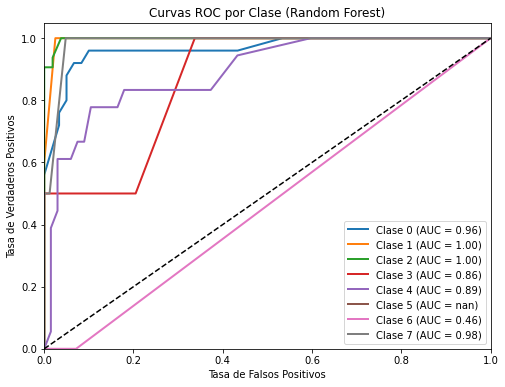

In [38]:
# Curva ROC - AUC
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Probabilidades de predicción para cada clase en el conjunto de prueba
y_probs_rf = random_forest.predict_proba(X_test)

# Calcular la curva ROC y el área bajo la curva (AUC) para cada clase
plt.figure(figsize=(8, 6))
for i in range(len(random_forest.classes_)):
    fpr, tpr, _ = roc_curve(y_test, y_probs_rf[:, i], 
                            pos_label=random_forest.classes_[i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, 
             label=f'Clase {random_forest.classes_[i]} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curvas ROC por Clase (Random Forest)')
plt.legend(loc='lower right')
plt.show()

## XGBoost

In [39]:
# IMPORTO LIBRERIAS NECESARIAS PARA EL MODELO
!pip install xgboost
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

In [40]:
# Divido los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=42)

In [41]:
# Creo y entreno el modelo XGBoost
xgboost_model = xgb.XGBClassifier(
    n_estimators=50,  # Número de árboles
    max_depth=3,       # Profundidad máxima de los árboles
    learning_rate=0.1, # Tasa de aprendizaje
    random_state=42
)
xgboost_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=50, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [42]:
# Realizo predicciones en el conjunto de prueba
y_pred_XG = xgboost_model.predict(X_test)
y_pred_XG

array([2, 1, 7, 1, 0, 0, 2, 1, 2, 4, 2, 4, 0, 0, 2, 1, 0, 0, 2, 0, 0, 1,
       2, 2, 0, 2, 4, 0, 2, 2, 4, 0, 0, 0, 7, 2, 0, 2, 4, 0, 0, 4, 2, 0,
       2, 0, 2, 4, 2, 0, 2, 2, 1, 2, 1, 0, 1, 2, 4, 2, 0, 0, 0, 2, 0, 2,
       0, 4, 1, 2, 4, 2, 4, 0, 0, 2, 0, 0, 0, 2, 1, 4, 0, 0, 2])

In [43]:
# Calculo la exactitud del modelo
accuracy_XG = accuracy_score(y_test, y_pred_XG)

# Mostrar la exactitud del modelo
print(f'Exactitud del modelo XGBoost: {accuracy_XG:.3f}')

Exactitud del modelo XGBoost: 0.788


#### OPTIMIZACIÓN DEL MODELO XGBoost

In [44]:
# Definir la cuadrícula de hiperparámetros a explorar
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.1, 0.01, 0.001]
}

In [45]:
# Realizar Grid Search
grid_search = GridSearchCV(estimator=xgboost_model, 
                           param_grid=param_grid, 
                           scoring='accuracy', 
                           cv=3)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=0.1, m...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=3,
                                     max_leaves=None,

In [46]:
# Obtener el mejor modelo y sus hiperparámetros
best_xgboost_model = grid_search.best_estimator_
best_params = grid_search.best_params_
best_params

{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50}

In [47]:
# Realizar predicciones en el conjunto de prueba con el mejor modelo
y_pred_XG = best_xgboost_model.predict(X_test)

In [48]:
# Calcular la exactitud del modelo
accuracy_XG = accuracy_score(y_test, y_pred_XG)

# Mostrar la exactitud y los mejores hiperparámetros
print(f'Exactitud del modelo XGBoost optimizado: {accuracy_XG:.2f}')
print('Mejores hiperparámetros:', best_params)

Exactitud del modelo XGBoost optimizado: 0.79
Mejores hiperparámetros: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50}


In [49]:
feature_importance2 = xgboost_model.feature_importances_
feature_importance2

array([0.03065073, 0.        , 0.03117945, 0.02566093, 0.03107143,
       0.06076387, 0.06507164, 0.25040624, 0.07947119, 0.02250495,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.02586619, 0.        , 0.01626541, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.01814797, 0.        , 0.        ,
       0.0248803 , 0.        , 0.        , 0.03609088, 0.        ,
       0.01301613, 0.        , 0.        , 0.        , 0.01045888,
       0.        , 0.        , 0.01305031, 0.01535312, 0.        ,
       0.        , 0.        , 0.        , 0.01467898, 0.06214478,
       0.04844438, 0.        , 0.        , 0.        , 0.02080122,
       0.        , 0.04650202, 0.        , 0.        , 0.01660505,
       0.02091382, 0.        ], dtype=float32)

### Métricas XGBoost

In [50]:
# ACCURACY
accuracy_XG

0.788235294117647

In [51]:
# R2
from sklearn.metrics import r2_score
r2_XG = r2_score(y_test, y_pred_XG)
r2_XG

0.1955707148347423

In [52]:
# F1-ScoreMacro
from sklearn.metrics import f1_score
f1_macro_XG = f1_score(y_test, y_pred_XG, average='macro')
f1_macro_XG

0.5086692140186532

In [53]:
# Realizo validación curzada para evaluar exhaustivamente 
# la exactitud del modelo TRAIN
from sklearn.model_selection import cross_val_score
cv_scores_XG_train = cross_val_score(xgboost_model, X_train, y_train, 
                                     cv=5, 
                                     scoring='accuracy')
cv_scores_XG_train

array([0.80882353, 0.77941176, 0.82352941,        nan,        nan])

In [54]:
# Realizo validación curzada para evaluar exhaustivamente la 
# exactitud del modelo TEST
from sklearn.model_selection import cross_val_score
cv_scores_XG_test = cross_val_score(xgboost_model, X_test, y_test, 
                                    cv=5, 
                                    scoring='accuracy')
cv_scores_XG_test

array([nan, nan, nan, nan, nan])

In [55]:
# MATRIZ DE CONFUSIÓN
confusion_XG = confusion_matrix(y_test, y_pred_XG)
confusion_XG

array([[24,  0,  0,  0,  1,  0,  0],
       [ 0,  5,  0,  0,  0,  0,  0],
       [ 0,  5, 27,  0,  0,  0,  0],
       [ 0,  0,  2,  0,  0,  0,  0],
       [ 7,  0,  0,  0, 10,  0,  1],
       [ 0,  0,  0,  0,  1,  0,  0],
       [ 1,  0,  0,  0,  0,  0,  1]])

In [56]:
# Reporte de Clasificación
class_report_XG = classification_report(y_test, y_pred_XG)
for line in class_report_XG.split('\n'):
    print(line)

              precision    recall  f1-score   support

           0       0.75      0.96      0.84        25
           1       0.50      1.00      0.67         5
           2       0.93      0.84      0.89        32
           3       0.00      0.00      0.00         2
           4       0.83      0.56      0.67        18
           6       0.00      0.00      0.00         1
           7       0.50      0.50      0.50         2

    accuracy                           0.79        85
   macro avg       0.50      0.55      0.51        85
weighted avg       0.79      0.79      0.77        85



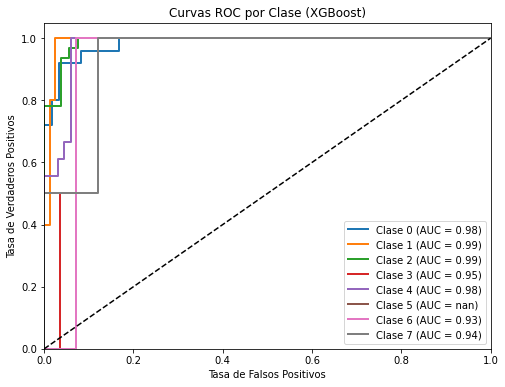

In [57]:
# Curva ROC - AUC 
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Probabilidades de predicción para cada clase en el conjunto de prueba
y_probs_xg = xgboost_model.predict_proba(X_test)

# Calcular la curva ROC y el área bajo la curva (AUC) para cada clase
plt.figure(figsize=(8, 6))
for i in range(len(xgboost_model.classes_)):
    fpr, tpr, _ = roc_curve(y_test, y_probs_xg[:, i], 
                            pos_label=xgboost_model.classes_[i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, 
             label=f'Clase {xgboost_model.classes_[i]} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curvas ROC por Clase (XGBoost)')
plt.legend(loc='lower right')
plt.show()

## NAIVE BAYES

In [58]:
from sklearn.naive_bayes import MultinomialNB

In [59]:
# Crear y entrenar el modelo Naive Bayes
naive_bayes_model = MultinomialNB()
naive_bayes_model.fit(X_train, y_train)

MultinomialNB()

In [60]:
# Realizar predicciones en el conjunto de prueba
y_pred_bayes = naive_bayes_model.predict(X_test)

In [61]:
# Calcular la exactitud del modelo
accuracy_bayes = accuracy_score(y_test, y_pred_bayes)

# Mostrar la exactitud del modelo
print(f'Exactitud del modelo Naive Bayes: {accuracy_bayes:.2f}')

Exactitud del modelo Naive Bayes: 0.06


### Métricas

In [62]:
# ACCURACY
accuracy_bayes

0.058823529411764705

In [63]:
# R2
from sklearn.metrics import r2_score
r2_bayes = r2_score(y_test, y_pred_bayes)
r2_bayes

-2.299385088393544

In [64]:
# F1-ScoreMacro
from sklearn.metrics import f1_score
f1_macro_bayes = f1_score(y_test, y_pred_bayes, average='macro')
f1_macro_bayes

0.03806089743589744

In [65]:
# Realizo validación curzada para evaluar exhaustivamente 
# la exactitud del modelo TRAIN
from sklearn.model_selection import cross_val_score
cv_scores_bayes_train = cross_val_score(naive_bayes_model, X_train, 
                                        y_train, 
                                        cv=5, 
                                        scoring='accuracy')
cv_scores_bayes_train

array([0.13235294, 0.17647059, 0.14705882, 0.13235294, 0.08823529])

In [66]:
# Realizo validación curzada para evaluar exhaustivamente la 
# exactitud del modelo TEST
from sklearn.model_selection import cross_val_score
cv_scores_bayes_test = cross_val_score(naive_bayes_model, X_test, 
                                       y_test, 
                                       cv=5, 
                                       scoring='accuracy')
cv_scores_bayes_test

array([0.17647059, 0.17647059, 0.23529412, 0.41176471, 0.17647059])

In [67]:
# MATRIZ DE CONFUSIÓN
confusion_bayes = confusion_matrix(y_test, y_pred_bayes)
confusion_bayes

array([[ 1,  8,  2,  3,  5,  0,  5,  1],
       [ 0,  2,  0,  0,  1,  0,  2,  0],
       [ 0, 13,  0,  4,  5,  1,  5,  4],
       [ 0,  2,  0,  0,  0,  0,  0,  0],
       [ 0,  7,  0,  2,  2,  0,  7,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  1,  0,  0,  0,  0,  0,  0],
       [ 0,  1,  0,  0,  1,  0,  0,  0]])

In [68]:
# Reporte de Clasificación
class_report_bayes = classification_report(y_test, y_pred_bayes)
for line in class_report_bayes.split('\n'):
    print(line)

              precision    recall  f1-score   support

           0       1.00      0.04      0.08        25
           1       0.06      0.40      0.10         5
           2       0.00      0.00      0.00        32
           3       0.00      0.00      0.00         2
           4       0.14      0.11      0.12        18
           5       0.00      0.00      0.00         0
           6       0.00      0.00      0.00         1
           7       0.00      0.00      0.00         2

    accuracy                           0.06        85
   macro avg       0.15      0.07      0.04        85
weighted avg       0.33      0.06      0.06        85



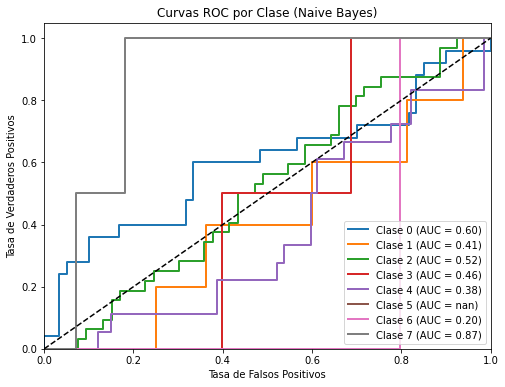

In [69]:
# Curva ROC - AUC 
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Probabilidades de predicción para cada clase en el conjunto de prueba
y_probs_nb = naive_bayes_model.predict_proba(X_test)

# Calcular la curva ROC y el área bajo la curva (AUC) para cada clase
plt.figure(figsize=(8, 6))
for i in range(len(naive_bayes_model.classes_)):
    fpr, tpr, _ = roc_curve(y_test, y_probs_nb[:, i], 
                            pos_label=naive_bayes_model.classes_[i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, 
             label=f'Clase {naive_bayes_model.classes_[i]} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curvas ROC por Clase (Naive Bayes)')
plt.legend(loc='lower right')
plt.show()

## SVM

In [70]:
from sklearn.svm import SVC

In [71]:
# Crear y entrenar el modelo SVM
svm_model = SVC(random_state=42)
svm_model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred_svm = svm_model.predict(X_test)

In [72]:
# Calcular la exactitud del modelo
accuracy_svm = accuracy_score(y_test, y_pred_svm)

# Mostrar la exactitud del modelo
print(f'Exactitud del modelo SVM: {accuracy_svm:.3f}')

Exactitud del modelo SVM: 0.376


### Métricas SVM

In [73]:
# ACCURACY
accuracy_svm

0.3764705882352941

In [74]:
# R2
from sklearn.metrics import r2_score
r2_svm = r2_score(y_test, y_pred_svm)
r2_svm

-0.00043235972329003225

In [75]:
# F1-ScoreMacro
from sklearn.metrics import f1_score
f1_macro_svm = f1_score(y_test, y_pred_svm, average='macro')
f1_macro_svm

0.07814407814407813

In [76]:
# Realizo validación curzada para evaluar exhaustivamente la 
# exactitud del modelo TRAIN
from sklearn.model_selection import cross_val_score
cv_scores_svm_train = cross_val_score(svm_model, X_train, y_train, 
                                      cv=5, 
                                      scoring='accuracy')
cv_scores_svm_train

array([0.20588235, 0.29411765, 0.29411765, 0.29411765, 0.29411765])

In [77]:
# Realizo validación curzada para evaluar exhaustivamente la 
# exactitud del modelo TEST
from sklearn.model_selection import cross_val_score
cv_scores_svm_test = cross_val_score(svm_model, X_test, y_test, 
                                     cv=5, 
                                     scoring='accuracy')
cv_scores_svm_test

array([0.41176471, 0.41176471, 0.35294118, 0.35294118, 0.35294118])

In [78]:
# MATRIZ DE CONFUSIÓN
confusion_svm = confusion_matrix(y_test, y_pred_svm)
confusion_svm

array([[ 0,  0, 25,  0,  0,  0,  0],
       [ 0,  0,  5,  0,  0,  0,  0],
       [ 0,  0, 32,  0,  0,  0,  0],
       [ 0,  0,  2,  0,  0,  0,  0],
       [ 0,  0, 18,  0,  0,  0,  0],
       [ 0,  0,  1,  0,  0,  0,  0],
       [ 0,  0,  2,  0,  0,  0,  0]])

In [79]:
# Reporte de Clasificación
class_report_svm = classification_report(y_test, y_pred_svm)
for line in class_report_svm.split('\n'):
    print(line)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        25
           1       0.00      0.00      0.00         5
           2       0.38      1.00      0.55        32
           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        18
           6       0.00      0.00      0.00         1
           7       0.00      0.00      0.00         2

    accuracy                           0.38        85
   macro avg       0.05      0.14      0.08        85
weighted avg       0.14      0.38      0.21        85



## GRADIENT BOOSTING

In [80]:
from sklearn.ensemble import GradientBoostingClassifier

# Crear y entrenar el modelo Gradient Boosting
gradient_boosting_model = GradientBoostingClassifier(random_state=42)
gradient_boosting_model.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [81]:
# Realizar predicciones en el conjunto de prueba
y_pred_gb = gradient_boosting_model.predict(X_test)

# Calcular la exactitud del modelo
accuracy_gb = accuracy_score(y_test, y_pred_gb)

# Mostrar la exactitud del modelo
print(f'Exactitud del modelo Gradient Boosting: {accuracy_gb}')

Exactitud del modelo Gradient Boosting: 0.8


#### OPTIMIZACIÓN DEL MODELO GB

In [82]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# Definir los hiperparámetros a explorar
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.1, 0.01, 0.001]
}

In [83]:
# Realizar la búsqueda de hiperparámetros con validación cruzada
grid_search = GridSearchCV(gradient_boosting_model, param_grid, 
                           cv=5, 
                           scoring='accuracy')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=42),
             param_grid={'learning_rate': [0.1, 0.01, 0.001],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [50, 100, 150]},
             scoring='accuracy')

In [84]:
# Obtener el mejor modelo con los mejores hiperparámetros
best_gradient_boosting = grid_search.best_estimator_

# Predicciones en el conjunto de prueba utilizando el mejor modelo
y_pred_best_gb = best_gradient_boosting.predict(X_test)

# Calcular la exactitud del modelo
accuracy_gb_opt = accuracy_score(y_test, y_pred_best_gb)
print(f'Accuracy: {accuracy_gb:.1f}')

# Obtener los mejores hiperparámetros
best_params_gb = grid_search.best_params_
print('Mejores hiperparámetros:', best_params_gb)

Accuracy: 0.8
Mejores hiperparámetros: {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 100}


In [85]:
feature_importance3 = gradient_boosting_model.feature_importances_
feature_importance3

array([8.20583583e-03, 3.87725272e-04, 3.94194934e-03, 1.25265192e-02,
       1.58162001e-02, 1.01915634e-01, 6.04793073e-02, 5.76344694e-01,
       1.72256362e-01, 4.45758932e-04, 0.00000000e+00, 4.54617212e-05,
       3.16278081e-05, 1.35100522e-03, 8.92318893e-04, 1.51630986e-03,
       6.12732714e-04, 4.46690064e-05, 7.42500010e-06, 4.26832725e-04,
       7.79349893e-04, 5.88528283e-04, 0.00000000e+00, 2.62406951e-04,
       1.00298375e-03, 5.13525030e-04, 2.49619768e-04, 2.84509017e-04,
       9.81105249e-04, 9.92045267e-04, 1.47319926e-03, 4.18902170e-04,
       1.51119925e-03, 1.24434468e-03, 1.50531417e-03, 1.13994515e-03,
       3.40427185e-05, 0.00000000e+00, 5.03794281e-04, 1.26587424e-04,
       3.35067978e-07, 1.29831564e-03, 3.78628096e-04, 9.48574701e-04,
       1.67395258e-05, 2.41951366e-06, 4.42445542e-04, 4.48990992e-05,
       7.59285941e-04, 6.31425682e-03, 1.58702199e-03, 0.00000000e+00,
       1.34543401e-03, 5.40596956e-06, 1.90400743e-03, 1.59706561e-03,
      

### Métricas GB

In [86]:
# ACCURACY
accuracy_gb

0.8

In [87]:
# R2
from sklearn.metrics import r2_score
r2_gb = r2_score(y_test, y_pred_gb)
r2_gb

0.37932359723289766

In [88]:
# F1-ScoreMacro
from sklearn.metrics import f1_score
f1_macro_gb = f1_score(y_test, y_pred_gb, average='macro')
f1_macro_gb

0.4934280411252297

In [89]:
# Realizo validación curzada para evaluar exhaustivamente la 
# exactitud del modelo TRAIN
from sklearn.model_selection import cross_val_score
cv_scores_gb_train = cross_val_score(gradient_boosting_model, X_train, 
                                     y_train, 
                                     cv=5, 
                                     scoring='accuracy')
cv_scores_gb_train

array([0.73529412, 0.72058824, 0.76470588, 0.77941176, 0.69117647])

In [90]:
# Realizo validación curzada para evaluar exhaustivamente la 
# exactitud del modelo TEST
from sklearn.model_selection import cross_val_score
cv_scores_gb_test = cross_val_score(gradient_boosting_model, X_test, 
                                    y_test, 
                                    cv=5, 
                                    scoring='accuracy')
cv_scores_gb_test

array([0.70588235, 0.70588235, 0.82352941, 0.82352941, 0.70588235])

In [91]:
# MATRIZ DE CONFUSIÓN
confusion_gb = confusion_matrix(y_test, y_pred_gb)
confusion_gb

array([[24,  0,  0,  0,  1,  0,  0,  0],
       [ 0,  5,  0,  0,  0,  0,  0,  0],
       [ 1,  4, 26,  0,  0,  1,  0,  0],
       [ 1,  0,  1,  0,  0,  0,  0,  0],
       [ 6,  0,  0,  0, 11,  0,  0,  1],
       [ 0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  1,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  2]])

In [92]:
# Reporte de Clasificación
class_report_gb = classification_report(y_test, y_pred_gb)
for line in class_report_gb.split('\n'):
    print(line)

              precision    recall  f1-score   support

           0       0.75      0.96      0.84        25
           1       0.56      1.00      0.71         5
           2       0.96      0.81      0.88        32
           3       0.00      0.00      0.00         2
           4       0.85      0.61      0.71        18
           5       0.00      0.00      0.00         0
           6       0.00      0.00      0.00         1
           7       0.67      1.00      0.80         2

    accuracy                           0.80        85
   macro avg       0.47      0.55      0.49        85
weighted avg       0.81      0.80      0.79        85



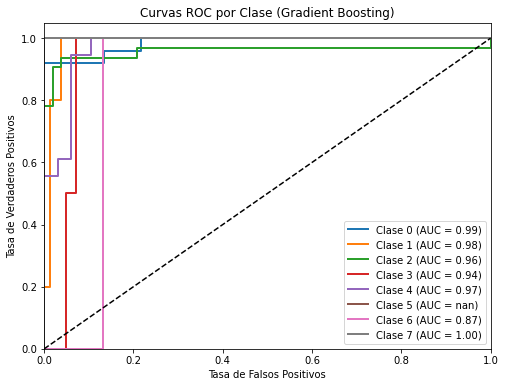

In [93]:
# Curva ROC-AUC
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Probabilidades de predicción para cada clase en el conjunto de prueba
y_probs_gb = gradient_boosting_model.predict_proba(X_test)

# Calcular la curva ROC y el área bajo la curva (AUC) para cada clase
plt.figure(figsize=(8, 6))
for i in range(len(gradient_boosting_model.classes_)):
    fpr, tpr, _ = roc_curve(y_test, 
                            y_probs_gb[:, i], 
                            pos_label=gradient_boosting_model.classes_[i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, 
             label=f'Clase {gradient_boosting_model.classes_[i]} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curvas ROC por Clase (Gradient Boosting)')
plt.legend(loc='lower right')
plt.show()

- Eliminando la variable "location_y" todos los algoritmos aumentan su exactitud.

In [94]:
## Output de las validaciones cruzadas
print (f'RANDOM FOREST')
print(f'Validación cruzada de RF TRAIN: {cv_scores_rf_train}')
print(f'Validación cruzada de RF TEST: {cv_scores_rf_test}')
print(f' ')
print (f'XGBoost')
print(f'Validación cruzada de XG TRAIN: {cv_scores_XG_train}')
print(f'Validación cruzada de XG TEST: {cv_scores_XG_test}')
print(f' ')
print (f'NAIVE BAYES')
print(f'Validación cruzada de NB TRAIN: {cv_scores_bayes_train}')
print(f'Validación cruzada de NB TEST: {cv_scores_bayes_test}')
print(f' ')
print (f'SVM')
print(f'Validación cruzada de SVM TRAIN: {cv_scores_svm_train}')
print(f'Validación cruzada de SVM TEST: {cv_scores_svm_test}')
print(f' ')
print (f'GRADIENT BOOSTING')
print(f'Validación cruzada de GB TEST: {cv_scores_gb_train}')
print(f'Validación cruzada de GB TRAIN: {cv_scores_gb_test}')

RANDOM FOREST
Validación cruzada de RF TRAIN: [0.72058824 0.67647059 0.80882353 0.73529412 0.75      ]
Validación cruzada de RF TEST: [0.70588235 0.76470588 0.82352941 0.52941176 0.76470588]
 
XGBoost
Validación cruzada de XG TRAIN: [0.80882353 0.77941176 0.82352941        nan        nan]
Validación cruzada de XG TEST: [nan nan nan nan nan]
 
NAIVE BAYES
Validación cruzada de NB TRAIN: [0.13235294 0.17647059 0.14705882 0.13235294 0.08823529]
Validación cruzada de NB TEST: [0.17647059 0.17647059 0.23529412 0.41176471 0.17647059]
 
SVM
Validación cruzada de SVM TRAIN: [0.20588235 0.29411765 0.29411765 0.29411765 0.29411765]
Validación cruzada de SVM TEST: [0.41176471 0.41176471 0.35294118 0.35294118 0.35294118]
 
GRADIENT BOOSTING
Validación cruzada de GB TEST: [0.73529412 0.72058824 0.76470588 0.77941176 0.69117647]
Validación cruzada de GB TRAIN: [0.70588235 0.70588235 0.82352941 0.82352941 0.70588235]
